In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pysam

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from pyUMI import bamStats as stats
from pyUMI import MSolverLib as solver
from pyUMI import R1Solver as rs1

In [7]:
import logging
logging.basicConfig(level=logging.INFO)

In [8]:
#st = pysam.AlignmentFile("/home/parastou/UMI/HiPSC.mult.exontag.bam","rb")
st = pysam.AlignmentFile("/data/parastou/UMI/data/Tet1.ens_exon_tagged.bam","rb")

### Mapping Stats

In [10]:
stats.mapping_stats(st, draw_pie=True)

### Cellular Barcode Info

In [ ]:
stats.cellbarcode_info(st, report_info=True, draw_pie=True);

### Present Flags

In [ ]:
cf = stats.flag_stats(st, report_info=True, draw_bar=True);

For description on BAM flags please check  https://broadinstitute.github.io/picard/explain-flags.html .

-------------------------------------------------------------------------------------------------------------------------

# Solver RANK1: 

## Resolves mutlimapped reads which their unique counterparts agree on a single gene

### Cell Barcode: ATATAG

In [11]:
st = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG.bam","rb")
m1 = solver.build_multimapping_hashtable(st, cell_barcode='ATATAG')
uh1, u1 = solver.build_uniques_associations(st, cell_barcodes=['ATATAG'])


Total number of alignments: 28,425,778

Total number of multimapped reads: 3,640,073


pyUMI/R1Solver.py:42: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if uniques[match][0] in genes:
INFO:pyUMI.R1Solver:	Number of multi reads with unique gene association :          66,187
INFO:pyUMI.R1Solver:	Total number of mappings of multi reads with unique gene association : 384,148


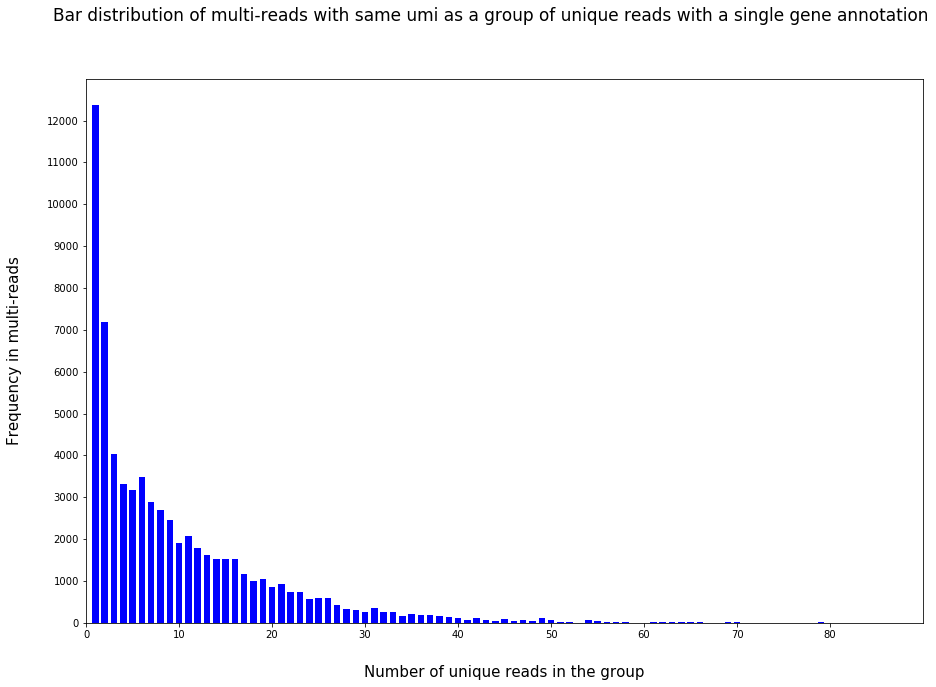

In [12]:
print;print "Total number of alignments: %s" %format(stats.count_alignments(st),",")
print;print "Total number of multimapped reads: %s" %format(len(m1),",")
r1 = rs1.multimap_multigene_generator(m1,1);
resolved_mm, rank1_solvers, r_total = rs1.rank1_multimap_solver(mm_generator=r1, uniques_hashtable=uh1, uniques=u1, report=True);
dist1 = rs1.unique_savers_dist(resolved_mm,m1,uh1,draw_bar=True);

In [ ]:
from collections import Counter
genes = [j for i,j in rank1_solvers]
a = max(Counter(genes).values())
for key, val in Counter(genes).items():
    if val == a :
        print key, val

In [26]:
names = [i for i,j in resolved_mm if j == 'ENSMUSG00000084349']

In [32]:
import pandas as pd
from collections import Counter

In [ ]:
gene_demux = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3ps1.bam", 'wb', template=st)

st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if r.has_tag('GE') and r.get_tag('GE') == 'ENSMUSG00000084349':
        gene_demux.write(r)

gene_demux.close()
pysam.index("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3ps1.bam")

In [17]:
st = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG.bam","rb")
gt = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3ps1.bam","rb")

In [27]:
gt.reset()
reads = gt.fetch(until_eof=True)

multi = []
for r in reads:
    if r.get_tag('NH') > 1 and r.query_name in names:
        multi.append((r.query_name, r.get_tag('XM')))

In [24]:
gt.reset()
reads = gt.fetch(until_eof=True)

unique = []
for r in reads:
    if r.get_tag('NH') == 1:
        unique.append((r.query_name, r.get_tag('XM')))

In [33]:
xm1 = Counter([j for i,j in multi])

In [39]:
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if r.get_tag('XM') == 'GCCTCGCACT' and r.query_name == 'HISEQ:280:C9J9KANXX:1:1306:7160:72501':
        print r.reference_name 
        print r.reference_start
        print r

chr13
115528923
HISEQ:280:C9J9KANXX:1:1306:7160:72501	272	3	115528923	0	50M	-1	-1	50	TAATCTCTGTTCGGTGATGGTAGCCTTTCTGCCCAGCTCGAGCCACAGAG	array('B', [37, 26, 15, 15, 34, 15, 36, 14, 36, 34, 14, 14, 31, 31, 16, 37, 36, 16, 16, 38, 38, 38, 37, 29, 38, 35, 16, 37, 38, 38, 35, 38, 36, 38, 38, 38, 38, 38, 38, 38, 38, 33, 36, 38, 35, 32, 15, 33, 33, 31])	[('XC', 'ATATAG'), ('XF', 'INTERGENIC'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 7), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), ('AS', 49)]
chr15
80079697
HISEQ:280:C9J9KANXX:1:1306:7160:72501	272	5	80079697	0	50M	-1	-1	50	TAATCTCTGTTCGGTGATGGTAGCCTTTCTGCCCAGCTCGAGCCACAGAG	array('B', [37, 26, 15, 15, 34, 15, 36, 14, 36, 34, 14, 14, 31, 31, 16, 37, 36, 16, 16, 38, 38, 38, 37, 29, 38, 35, 16, 37, 38, 38, 35, 38, 36, 38, 38, 38, 38, 38, 38, 38, 38, 33, 36, 38, 35, 32, 15, 33, 33, 31])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000060036'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 7), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), ('AS', 49), ('GS

In [13]:
gt = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3ps1.bam","rb")
yc_reads = pysam.AlignmentFile('/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3ps1_GCCTCGCACT.bam', 'wb', template=gt)

red = '255,0,0'
yellow = '255,255,0'
black = '0,0,0'
white = '255,255,255'

gt.reset()
reads = gt.fetch(until_eof=True)

for r in reads:
    if r.has_tag('RG'):
        r.set_tag('RG', None)
    if r.get_tag('XM') == 'GCCTCGCACT':
        if r.has_tag('NH'):
            nh = r.get_tag('NH')
            if nh == 1:
                r.tags += [('YC', red)]
            else:
                r.tags += [('YC', yellow)]
        yc_reads.write(r)
    
yc_reads.close()
pysam.index('/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3ps1_GCCTCGCACT.bam')

''

In [ ]:
yc_reads = pysam.AlignmentFile('/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3ps1_GCCTCGCACT_dups.bam', 'wb', template=gt)



In [35]:
gt.reset()
reads = gt.fetch(until_eof=True)

for r in reads:
    if r.get_tag('XM') == 'GCCTCGCACT':
        print r.get_tag('AS')

49
49
49
49
49
49
49
49
49
49
49
49
49
41
49
49
49
49
43
49
49
49
47
49
49
49
49
49
49
49
49


In [19]:
st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if r.query_name=='HISEQ:280:C9J9KANXX:2:2316:12568:51812':
        print r
        

HISEQ:280:C9J9KANXX:2:2316:12568:51812	16	5	80078387	3	39M280N11M	-1	-1	50	GAAGTCATTGGTCACCTCACCATAATGCACAAAGCCACCCAGTGGGTTGA	array('B', [27, 38, 38, 38, 38, 38, 37, 36, 38, 38, 38, 37, 36, 25, 31, 35, 35, 30, 33, 15, 30, 16, 38, 34, 37, 38, 37, 25, 15, 15, 21, 14, 25, 33, 25, 14, 14, 14, 14, 15, 14, 37, 29, 28, 14, 31, 31, 26, 22, 27])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000060036'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 2), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), ('AS', 50), ('GS', '-')]
HISEQ:280:C9J9KANXX:2:2316:12568:51812	256	59	13203511	3	50M	-1	-1	50	TCAACCCACTGGGTGGCTTTGTGCATTATGGTGAGGTGACCAATGACTTC	array('B', [27, 38, 38, 38, 38, 38, 37, 36, 38, 38, 38, 37, 36, 25, 31, 35, 35, 30, 33, 15, 30, 16, 38, 34, 37, 38, 37, 25, 15, 15, 21, 14, 25, 33, 25, 14, 14, 14, 14, 15, 14, 37, 29, 28, 14, 31, 31, 26, 22, 27])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000084349'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 2), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), 

In [20]:
gene_demux = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3.bam", 'wb', template=st)

st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if r.has_tag('GE') and r.get_tag('GE') == 'ENSMUSG00000060036':
        gene_demux.write(r)

gene_demux.close()
pysam.index("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3.bam")

''

In [21]:
ft = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3.bam","rb")

In [34]:
ft.reset()
reads = ft.fetch(until_eof=True)
for r in reads:
    if r.get_tag('XM') == 'GCCTCGCACT':
        print r.get_tag('AS')

50
50
50
50
44
50
50
50
50
50
50
50
50
50
50
50
49
49
49
49
49
49
49
49
49
49
49
49
49
41


In [28]:
ft = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3.bam","rb")
yc_reads = pysam.AlignmentFile('/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3_GCCTCGCACT.bam', 'wb', template=ft)

red = '255,0,0'
yellow = '255,255,0'
purple = '255,0,255'
black = '0,0,0'
white = '255,255,255'

ft.reset()
reads = ft.fetch(until_eof=True)

for r in reads:
    if r.has_tag('RG'):
        r.set_tag('RG', None)
    if r.get_tag('XM') == 'GCCTCGCACT':
        if r.has_tag('NH'):
            nh = r.get_tag('NH')
            if nh == 1:
                r.tags += [('YC', red)]
            else:
                r.tags += [('YC', purple)]
        yc_reads.write(r)
    
yc_reads.close()
pysam.index('/data/parastou/UMI/data/MUS/sample_ATATAG_Rpl3_GCCTCGCACT.bam')

''

In [88]:
#len(multi) = 42855
#len(multi) = 1371
loci = [j for i,j in multi]
Counter(loci)

Counter({13202856: 3,
         13202863: 1,
         13203038: 2,
         13203048: 2,
         13203049: 1,
         13203060: 6,
         13203065: 8,
         13203105: 7,
         13203128: 1,
         13203343: 7,
         13203344: 4,
         13203362: 13,
         13203370: 1,
         13203421: 3,
         13203446: 5,
         13203486: 162,
         13203487: 9,
         13203488: 28,
         13203496: 33,
         13203497: 6,
         13203498: 6,
         13203506: 28,
         13203507: 23,
         13203508: 23,
         13203509: 1,
         13203511: 16,
         13203513: 15,
         13203514: 41,
         13203515: 69,
         13203516: 25,
         13203519: 42,
         13203521: 1,
         13203522: 1,
         13203545: 1,
         13203546: 1,
         13203566: 3,
         13203567: 6,
         13203571: 43,
         13203572: 7,
         13203573: 46,
         13203574: 31,
         13203575: 1,
         13203576: 4,
         13203577: 113,
         1320

In [89]:
print max(loci)
print min(loci)
print max(loci) - min(loci)

13203818
13202856
962


In [71]:
y1 = Counter(loci).keys()
y2 = sorted([int(str(i)[4:]) for i in y1])
y3 = list(chain.from_iterable([range(i, i + 50) for i in y2]))
y4 = sorted(list(np.unique(y3)))

[2856,
 2857,
 2858,
 2859,
 2860,
 2861,
 2862,
 2863,
 2864,
 2865,
 2866,
 2867,
 2868,
 2869,
 2870,
 2871,
 2872,
 2873,
 2874,
 2875,
 2876,
 2877,
 2878,
 2879,
 2880,
 2881,
 2882,
 2883,
 2884,
 2885,
 2886,
 2887,
 2888,
 2889,
 2890,
 2891,
 2892,
 2893,
 2894,
 2895,
 2896,
 2897,
 2898,
 2899,
 2900,
 2901,
 2902,
 2903,
 2904,
 2905,
 2906,
 2907,
 2908,
 2909,
 2910,
 2911,
 2912,
 3038,
 3039,
 3040,
 3041,
 3042,
 3043,
 3044,
 3045,
 3046,
 3047,
 3048,
 3049,
 3050,
 3051,
 3052,
 3053,
 3054,
 3055,
 3056,
 3057,
 3058,
 3059,
 3060,
 3061,
 3062,
 3063,
 3064,
 3065,
 3066,
 3067,
 3068,
 3069,
 3070,
 3071,
 3072,
 3073,
 3074,
 3075,
 3076,
 3077,
 3078,
 3079,
 3080,
 3081,
 3082,
 3083,
 3084,
 3085,
 3086,
 3087,
 3088,
 3089,
 3090,
 3091,
 3092,
 3093,
 3094,
 3095,
 3096,
 3097,
 3098,
 3099,
 3100,
 3101,
 3102,
 3103,
 3104,
 3105,
 3106,
 3107,
 3108,
 3109,
 3110,
 3111,
 3112,
 3113,
 3114,
 3115,
 3116,
 3117,
 3118,
 3119,
 3120,
 3121,
 3122,
 3123,

In [81]:
y5 = zip(y4[1:], y4[:-1])
y6 = [(i,j) for i,j in y5 if i - j > 1]
y6

[(3038, 2912), (3343, 3177), (3421, 3419), (3699, 3697)]

In [69]:
st.reset()
reads = st.fetch(until_eof=True)


[[1, 2, 3], [4, 5, 6], [2, 7, 8]]

In [46]:
uloci = [j for i,j in unique]
Counter(uloci)

Counter({12969038: 1,
         13202595: 1,
         13202604: 2,
         13202620: 4,
         13202621: 2,
         13202705: 8,
         13203060: 1,
         13203065: 2,
         13203067: 1,
         13203486: 34,
         13203487: 2,
         13203488: 6,
         13203496: 3,
         13203497: 1,
         13203499: 1,
         13203506: 2,
         13203507: 3,
         13203508: 2,
         13203511: 1,
         13203513: 3,
         13203514: 4,
         13203515: 5,
         13203516: 3,
         13203519: 6,
         13203571: 2,
         13203572: 2,
         13203573: 3,
         13203574: 12,
         13203575: 1,
         13203576: 1,
         13203577: 17,
         13203578: 1,
         13203579: 4,
         13203580: 1,
         13203581: 1,
         13203582: 4,
         13203586: 5,
         13203587: 1,
         13203588: 1,
         13203600: 1,
         13203601: 6,
         13203602: 1,
         13203606: 2,
         13203611: 3,
         13203612: 3,
       

In [41]:
st.reset()
reads = st.fetch(until_eof=True)
chrs = []
for r in reads:
    if not r.is_unmapped and r.get_tag('XM')=='GCCTCGCACT':
        #print r.get_tag('NH'), r.get_tag('NM')
        #print r.reference_name, r.reference_start
        chrs.append(r.reference_name)
print np.unique(chrs)

['chr13' 'chr15' 'chr3' 'chr8' 'chrX']


In [47]:
st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if not r.is_unmapped and r.get_tag('XM')=='GCCTCGCACT' and r.query_name=='HISEQ:280:C9J9KANXX:1:1106:12170:95091':
        print r.reference_name, r.reference_start
        if r.has_tag('GE'):
            print r.get_tag('GE')
        print r.get_tag('NM')
        print

chr13 115528923
0

chr15 80079697
ENSMUSG00000060036
0

chr3 92227835
0

chr3 92262637
0

chr8 75274841
0

chrX 13203362
ENSMUSG00000084349
0

chrX 74171445
ENSMUSG00000084131
0



In [52]:
st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if not r.is_unmapped and r.get_tag('XM')=='GCCTCGCACT' and r.query_name=='HISEQ:280:C9J9KANXX:1:1106:12170:95091':
        print r.reference_name + ':' + str(r.reference_start)
        print r
        print

chr13:115528923
HISEQ:280:C9J9KANXX:1:1106:12170:95091	272	3	115528923	0	50M	-1	-1	50	TAATCTCTGTTCGGTGATGGTAGCCTTTCTGCCCAGCTCGAGCCACAGAG	array('B', [36, 37, 36, 37, 37, 36, 38, 31, 38, 38, 38, 35, 36, 38, 34, 38, 36, 38, 37, 38, 38, 38, 38, 38, 34, 36, 38, 36, 38, 38, 38, 38, 37, 35, 33, 38, 27, 38, 35, 37, 30, 33, 38, 34, 38, 33, 31, 34, 34, 33])	[('XC', 'ATATAG'), ('XF', 'INTERGENIC'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 7), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), ('AS', 49)]

chr15:80079697
HISEQ:280:C9J9KANXX:1:1106:12170:95091	272	5	80079697	0	50M	-1	-1	50	TAATCTCTGTTCGGTGATGGTAGCCTTTCTGCCCAGCTCGAGCCACAGAG	array('B', [36, 37, 36, 37, 37, 36, 38, 31, 38, 38, 38, 35, 36, 38, 34, 38, 36, 38, 37, 38, 38, 38, 38, 38, 34, 36, 38, 36, 38, 38, 38, 38, 37, 35, 33, 38, 27, 38, 35, 37, 30, 33, 38, 34, 38, 33, 31, 34, 34, 33])	[('XC', 'ATATAG'), ('GE', 'ENSMUSG00000060036'), ('XF', 'CODING'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 7), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), ('AS', 49), (

In [53]:
yc_reads = pysam.AlignmentFile('/data/parastou/UMI/data/MUS/sample_ATATAG_GCCTCGCACT.bam', 'wb', template=st)

red = '255,0,0'
yellow = '255,255,0'
purple = '255,0,255'
black = '0,0,0'
white = '255,255,255'

st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if not r.is_unmapped and r.get_tag('XM')=='GCCTCGCACT':
        if r.has_tag('RG'):
            r.set_tag('RG', None)
        nh = r.get_tag('NH')
        if nh == 1:
            r.tags += [('YC', red)]
        else:
            r.tags += [('YC', yellow)]
        yc_reads.write(r)
    
yc_reads.close()
pysam.index('/data/parastou/UMI/data/MUS/sample_ATATAG_GCCTCGCACT.bam')

''

In [9]:
st = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG.bam","rb")
reads = st.fetch(until_eof=True)

table = {}

for r in reads:
    if not r.is_unmapped:
        xm = r.get_tag('XM')
        gene = None
        if r.has_tag('GE'):
            gene = r.get_tag('GE')
        if xm in table:
            table[xm].append(gene)
        else:
            table.update({xm:[gene]})

In [12]:
table2 = {}
for key, item in table.items():
    if not None in item and len(np.unique(item)) == 1:
        table2.update({key:item})

In [13]:
table2

{'CCTCAAGCTG': ['B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888',
  'B2_Mm2_dup26888'],
 'ACCCATGAAT': ['ENSMUSG00000000740',
  'ENSMUSG00000000740',
  'ENSMUSG00000000740',
  'ENSMUSG00000000740',
  'ENSMUSG00000000740',
  'ENSMUSG00000000740',
  'ENSMUSG00000000740',
  'ENSMUSG00000000740'],
 'TTAGCCGTTA': ['ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885',
  'ENSMUSG00000035885'],
 'CTGGTCGACA': ['ENSMUSG0

In [14]:
table2 = {}
for key, item in table.items():
    if not None in item and len(np.unique(item)) == 2:
        table2.update({key:item})

In [15]:
table2

{'TTAGCCGTTG': ['ENSMUSG00000021953', 'ENSMUSG00000023505'],
 'CGACCACACA': ['ENSMUSG00000082145', 'ENSMUSG00000040242'],
 'ATGGGTACAA': ['ENSMUSG00000025393',
  'ENSMUSG00000025393',
  'ENSMUSG00000025393',
  'ENSMUSG00000025393',
  'ENSMUSG00000025393',
  'ENSMUSG00000025393',
  'ENSMUSG00000025393',
  'ENSMUSG00000025393',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427',
  'ENSMUSG00000026427'],
 'CCGGAGTTAA': ['ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUSG00000050299',
  'ENSMUS

In [17]:
st = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG.bam","rb")
reads = st.fetch(until_eof=True)

db = {}
for r in reads:
    if r.has_tag('NH') and r.get_tag('NH') == 1 and r.has_tag('GE'):
        gene = r.get_tag('GE')
        if gene in db:
            db[gene].append(r.reference_start)
        else:
            db.update({gene:[r.reference_start]})

In [20]:
for key, value in db.items():
    print key, min(value), max(value)

ENSMUSG00000028180 157534296 157548338
RSINE1_dup49288 101838962 101838962
ENSMUSG00000028184 148815854 148815941
ENSMUSG00000028187 146506339 146521185
ENSMUSG00000002012 73656126 73656274
ENSMUSG00000028189 146459786 146465785
ORR1A4-int_dup952 105116194 105116194
B1_Mus1_dup26565 115132200 115132332
B2_Mm2_dup36719 116295800 116295852
B2_Mm2_dup32458 148958908 148958908
B2_Mm2_dup17545 59881741 59881741
B2_Mm2_dup17543 59849064 59849064
L1Md_T_dup15793 32816640 32816651
B2_Mm2_dup36712 116171686 116171686
B2_Mm2_dup31842 125208522 125275289
ENSMUSG00000033323 80407962 80459959
B2_Mm2_dup31846 125329441 125329516
L1_Mur3_dup24008 15980815 15980815
ENSMUSG00000020755 115935402 115966575
B2_Mm2_dup6602 30900504 30900504
ENSMUSG00000020752 115892599 115893986
B1_Mur1_dup26769 95301352 95301429
B2_Mm1a_dup6945 29961126 29961140
B2_Mm1a_dup6944 29947953 29947987
B2_Mm1a_dup6947 29988608 29988608
L1MD1_dup138 137091030 137091032
ENSMUSG00000020758 116008232 116008318
B2_Mm1a_dup6942 299127

In [8]:
#'GCCTCGCACT'
st = pysam.AlignmentFile("/data/parastou/UMI/data/MUS/sample_ATATAG.bam","rb")

In [9]:
st.reset()
reads = st.fetch(until_eof=True)
for r in reads:
    if r.get_tag('XM') == 'GCCTCGCACT':
        print r

HISEQ:280:C9J9KANXX:1:1106:12170:95091	272	3	115528923	0	50M	-1	-1	50	TAATCTCTGTTCGGTGATGGTAGCCTTTCTGCCCAGCTCGAGCCACAGAG	array('B', [36, 37, 36, 37, 37, 36, 38, 31, 38, 38, 38, 35, 36, 38, 34, 38, 36, 38, 37, 38, 38, 38, 38, 38, 34, 36, 38, 36, 38, 38, 38, 38, 37, 35, 33, 38, 27, 38, 35, 37, 30, 33, 38, 34, 38, 33, 31, 34, 34, 33])	[('XC', 'ATATAG'), ('XF', 'INTERGENIC'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 7), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), ('AS', 49)]
HISEQ:280:C9J9KANXX:1:1202:2725:64176	272	3	115528923	0	50M	-1	-1	50	TAATCTCTGTTCGGTGATGGTAGCCTTTCTGCCCAGCTCGAGCCACAGAG	array('B', [38, 37, 34, 38, 36, 16, 15, 38, 36, 14, 24, 37, 36, 38, 38, 38, 34, 38, 36, 37, 16, 34, 38, 33, 38, 38, 38, 37, 38, 38, 38, 35, 35, 38, 38, 38, 38, 38, 32, 37, 33, 36, 37, 38, 38, 33, 34, 34, 33, 33])	[('XC', 'ATATAG'), ('XF', 'INTERGENIC'), ('PG', 'STAR'), ('RG', 'A'), ('NH', 7), ('NM', 0), ('XM', 'GCCTCGCACT'), ('UQ', 0), ('AS', 49)]
HISEQ:280:C9J9KANXX:1:1214:4524:20392	272	3	115528923	0	50M

In [14]:
yc_reads = pysam.AlignmentFile('/data/parastou/UMI/data/MUS/sample_ATATAG_poster.bam', 'wb', template=st)
xms = ['TTTGCGGGGC', 'ACAGTTCTCT', 'GCCACCTTCA', 'CGGGAGGACG', 'TAGGCGGGGA', 'TGCGTGCTGG', 'TCGTACTGAG']
st.reset()
reads = st.fetch(until_eof=True)

red = '255,0,0'
yellow = '255,255,0'
purple = '255,0,255'
black = '0,0,0'
white = '255,255,255'

st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if not r.is_unmapped:
        if r.has_tag('RG'):
            r.set_tag('RG', None)
        if r.get_tag('XM')=='GCCTCGCACT':
            nh = r.get_tag('NH')
            if nh == 1:
                r.tags += [('YC', red)]
            else:
                r.tags += [('YC', yellow)]
            yc_reads.write(r)
        elif r.get_tag('XM') in xms:
            yc_reads.write(r)
    
yc_reads.close()
pysam.index('/data/parastou/UMI/data/MUS/sample_ATATAG_poster.bam')

''

In [11]:
'TTTGCGGGGC'
'ACAGTTCTCT'
'GCCACCTTCA'
st.reset()
reads = st.fetch(until_eof=True)

for r in reads:
    if r.has_tag('GE') and r.get_tag('GE') == 'ENSMUSG00000060036':
        print r.get_tag('XM')

ATAGATTATC
ATAACTGAAC
TAGTCGGGAG
AAACAAGAAC
TGCTCTGAAA
ATAGATTATC
GACCCAGCCT
CACGCAAGTT
AACTTGTTTG
AACTTGTTTG
GCAGCGATGT
TTTTTACAAT
AGTGGGGTCG
TTGTGCAATA
GGAAATAGAA
TCGCCTGTGT
GTGGAACAAT
CAACTCGGGA
CAACTCGGGA
CAACTCGGGA
CAACTCGGGA
CAACTCGGGA
CAACTCGGGA
GCAAAATTTG
ACGGTGTATT
TGGTTGCCGA
TGGGGGGGCA
ATGTGACCTA
TGGGGGGGCA
GTTATAACCG
TGGGATTGGT
CTTGAAGTCA
CCGTTTGCAT
GTGGAATTGG
TGATCGTATC
CTTGAAGTCA
GTTATAACCG
TGATAGGTTG
CTTTGACGAT
GTTATAACCG
CGCAATTTCG
CTGCAGGTAT
CGCAATTTCG
GTACGCCGCT
CTCGCATCTA
TGGGATTGGT
TGCAGAGATT
ACGGTGTATT
GTTATAACCG
AATGTCGGGA
CATGGCTGTA
CTGCAGGTAT
CTTTATTTGG
GTGGAATTGG
CAATCTGGAT
AGTTCGAGTA
GCGTCTAAGA
TTGTGAATCA
CGGACTTTAG
CTTTGACGAT
ACGGTGTATT
TAGGTGCATT
TTATTTTATT
AGTTCGAGTA
GGGCGGTGCT
GACTTGGTTA
TGCAGAGATT
GGGCGGTGCT
TTATTTTATT
ACGGTGTATT
ACCGTCTTAG
TGGTTGCCGA
GACTAGTCTG
TGGTTGCCGA
GCTGGAAGGG
GTACGCCGCT
TTGTGAATCA
ATGTGACCTA
GTGTTGCTGA
TACGTGTCTC
AAGGAATTCC
AAGGAATTCC
TGCAGAGATT
TGGTTGCCGA
CGCAATTTCG
ACCGTCTTAG
ACGGTGTATT
TGGTTGCCGA
TGCAGAGATT
AAGGAATTCC
GGCGTCAGGA